# Matplotlib

*Chris Wu*  
*2016年11月*

**注意：建议无经验的读者先阅读 [Pandas笔记](https://github.com/wklchris/Note-by-Jupyter/blob/master/Python/Pandas.ipynb)。不过如果你只是想要学习简单的画图功能而不是一整套数据可视化方案，你可以不必学习 Pandas 而直接阅读本笔记。**

推荐读者在了解基本的 matplotlib 函数后，前往官方的 [Matplotlib Examples](http://matplotlib.org/examples/index.html) 阅读一些例子，它们非常清晰简明。

---

本手册中的每一个例子都默认加载了以下三行内容：

In [1]:
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt

# 引言：简单的示例

最基本的命令是 plt.plot 和 plt.show 命令：

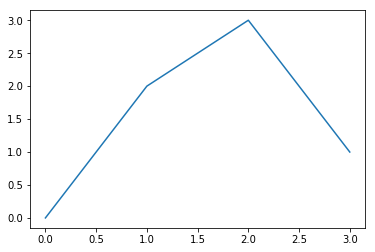

In [2]:
x = [0, 1, 2, 3]
y = [0, 2, 3, 1]
plt. plot(x, y)
plt.show()

如果你有 NumPy 相关的知识，你也可以使用其他命令：

In [3]:
# 你也可以使用以下两种写法，返回结果一致
x = np.linspace(0, 4, 4)  # 区间[0, 4]上一共4个点的均匀数组
x = np.arange(0, 5, 1)    # 区间[0, 5)上步长为1的均匀数组

# 基础命令

## 绘图：plt.plot

最基本的 plt.plot 命令还有许多参数可以使用。包括线型（linestyle）、线宽（linewidth）、点样式（marker）和线色(linecolor)。

| **线型**    |          |           |            |
| ---       | ---         | ---       | ---         |
| '-' 实线    |  '--' 虚线    | '-.' 点划线  |  ':' 点线      |
| **点样式**   |          |           |            |
| '.' 实心点   | ',' 像素点   | 'o' 圆点   | 's' 方块      |
| 'v' 下折箭头  | '^' 上折箭头  | '<' 左折箭头  | '>' 右折箭头   | 
| 'p' 五边形   | '\*' 星形    | 'h' 六边形   | 'H' 变种六边形  |
| '+' 加号    |  'x' X号     | 'D' 钻石形   |  'd' 纤钻石形  | 
| '&#124;' 竖线    | '\_' 横线    |          |          |
| **线色**    |           |          |            |
| RGB  | 'r' 红  | 'g' 绿   | 'b' 蓝  |  
| CMYK | 'c'/'m' 青/洋红 | 'y'/'k' 黄/黑  | 'w' 白 |

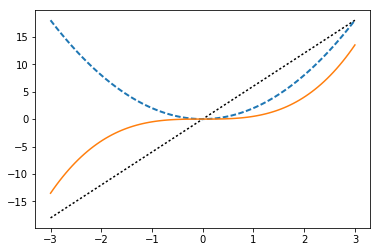

In [4]:
x = np.linspace(-3, 3, 100)
y1 = 6*x
y2 = 2*x**2

plt.plot(x, y1, color='black', linestyle=':')  # 你也可以偷懒写成：plt.plot(x, y1, 'b:')
plt.plot(x, y2, linewidth=2, linestyle='--')
plt.plot(x, [xi**3/2 for xi in x])
plt.show()

其中颜色**可以自己用 RGB 坐标，或者灰度，或者 6位HTML颜色码**指定。

    ... color = '#66ccff'  # 写成大写形式也可以：'#66CCFF' 
    ... color = (1, 0, 0)  # RGB形式
    ... color = '0.8 '    # 灰度形式 (1.0是白色, 0.0 是黑色)

其他的一些可能用到的参数也列出如下，请自行测试：

| 参数 | 含义 | 可选值 |
| --- | --- | --- |
| markeredgewidth | 点边线宽度 | 数字 |
| markeredgecolor | 点边线颜色 | 同 linecolor |
| markerfacecolor | 点内部颜色 | 同 linecolor |
| markersize    | 点大小     | 数字 | 
| dashes       | 虚线比例   | 元组(a, b)，“线：空距” | 
| drawstyle     | 绘制样式   | 'default/steps/steps-pre/steps-mid' |
| solid_capstyle  | 线段末端样式 | 'butt/round/projecting' |

## 叠加绘图：plt.hold

一个简单的命令，用于控制是否开启叠加绘图模式（默认开启）。

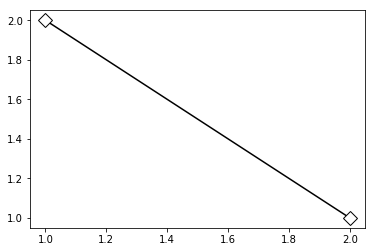

In [5]:
plt.plot([1, 2], [1, 2], 'r-')  # 这条命令被后面的覆盖了，没有显示出来
plt.hold(False)
plt.plot([1, 2], [2, 1], 'k-D', markersize=10, markerfacecolor='w')
plt.hold(True)
plt.show()

## 关闭图片： plt.close

这个命令一般配合 'all' 参数使用，可以关闭所有的现有 figure （也就是清空 plt.show 的内容）。

    plt.close('all')

## 坐标轴区间：plt.axis/plt.xlim/plt.ylim

关于坐标轴数值范围的问题使用这几个命令可以解决。例如，可以通过 plt.axis 命令调整绘图范围：

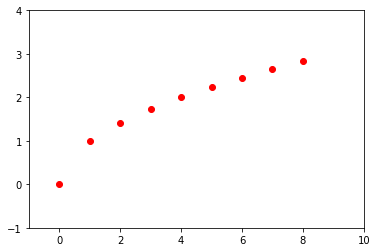

In [6]:
x = np.arange(0, 9, 1)
y = x**(1/2)
plt.plot(x, y, 'ro')

plt.axis([-1, 10, -1, 4])
plt.show()

plt.axis 也可以用 xmin/xmax/ymin/ymax 参数，仅仅指定一侧的范围，比如：

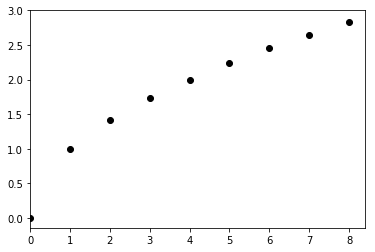

In [7]:
plt.plot(x, y, 'ko')

plt.axis(xmin=0, ymax=3)
plt.show()

其他的一些 plt.axis 的参数：

| 参数可选值 | 含义 |
| --- | --- |
| 'off'    | 去除坐标轴 |
| 'equal'  | 使坐标轴区间长相同 | 
| 'scaled' | 使坐标轴单位刻度长相同 |
| 'tight'  | 使绘图范围恰好包括所有数据点 |
| 'square' | 结合 'equal' 与 'scaled'|

下面是一个例子：

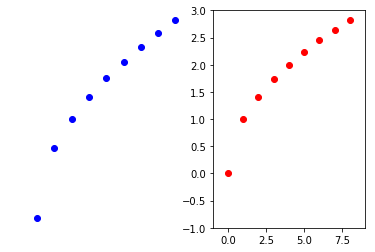

In [8]:
# subplot 是子图命令，(1,2,1)表示一共1行2列，画子图1
ax1 = plt.subplot(1, 2, 1)
plt.plot(x, y, 'bo')
plt.axis('off')

ax2 = plt.subplot(1, 2, 2)
plt.plot(x, y, 'ro')
plt.axis([-1, 9, -1, 3], 'scaled')

plt.show()

plt.xlim 还有 plt.ylim 的用法就不多说了，一句话带过：

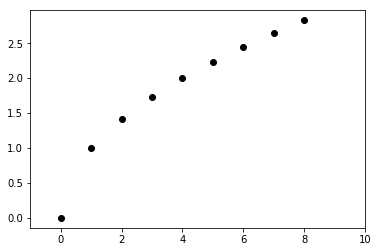

In [9]:
plt.plot(x, y, 'ko')

plt.xlim([-1, 10])
plt.show()

## 坐标轴刻度：plt.xticks/plt.yticks

可以通过数字的方式指定，也可以同时给出刻度位置和字符。注意两点：

- **坐标轴刻度命令经常用于指定坐标轴的最小分度值。**
- **坐标轴刻度的上下限可以与坐标轴区间不同。**由于绘图是基于坐标轴区间的，因此在区间外的刻度无法显示。

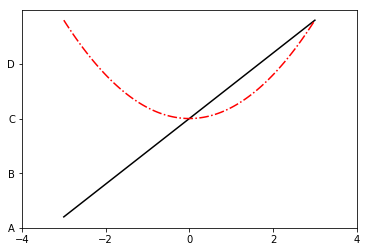

In [10]:
x = np.linspace(-3, 3, 100)
y1 = 6*x
y2 = 2*x**2
plt.plot(x, y1, 'k-', x, y2, 'r-.')

plt.xticks(np.linspace(-4, 4, 5))
plt.yticks(np.arange(-20, 20, 10), list('ABCD'))
plt.show()

## 坐标轴与标题：plt.xlabel/plt.ylabel，plt.title

它们支持 LaTeX 语法形式的输入（写在一对美元符号内）。

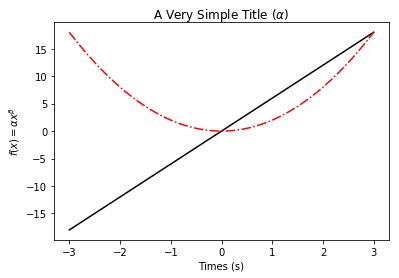

In [11]:
plt.plot(x, y1, 'k-', x, y2, 'r-.')
plt.title(r'A Very Simple Title ($\alpha$)')  # LaTeX code included

plt.xlabel('Times (s)')
plt.ylabel(r'$f(x)=\alpha x ^{\beta}$')
plt.show()

## 网格线：plt.grid

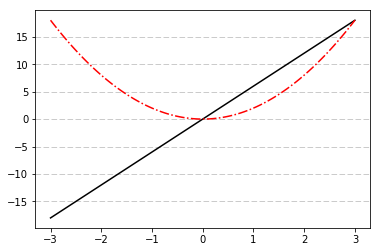

In [12]:
plt.plot(x, y1, 'k-', x, y2, 'r-.')

# 其实简单地使用 "plt.grid(True)"  就可以显示网格
plt.grid(axis='y', linestyle='--', color='0.75')  # 灰度适当很重要
plt.show()

## 图例：plt.legend

图例命令 plt.legend 需要与 plt.plot 命令中的标签参数 label=[value] 配合使用。

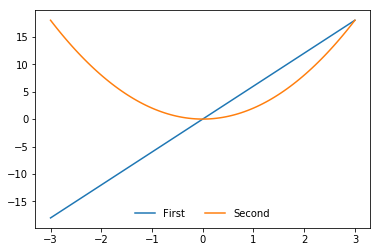

In [13]:
plt.plot(x, y1, label ='First')
plt.plot(x, y2, label ='Second')
plt.legend(loc='lower center', ncol =2)
plt.show()

图例命令的loc参数用法如下所示。比如上例的 loc='lower center' 实质与 loc=7 等价。

| 可选值 | 对应数值 | 含义 |  可选值 | 对应数值 | 含义 |  可选值 | 对应数值 | 含义 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 'upper right' | 1  | 右上角 | 'upper left'  | 2  | 左上角 | 'lower left'  | 3  | 左下角 |
| 'lower right' | 4  | 右下角 | 'right'     | 5  | 右侧  | 'center left'  | 6  | 中偏左 |
| 'center right' | 7  | 中偏右 | 'lower center' | 8  | 底部中间 | 'upper center' | 9  | 顶部中间 |
| 'center'    | 10  | 正中间 | 'best'     | 无  | 自动寻位 |

其他可能用到的参数：

| 参数 | 含义 | 可选值 |
| --- | --- | --- |
| loc | 图例位置 | 见上表 |
| ncol | 图例的列数 | 数值 |
| fontsize | 图例的字号（仅当prop未设置时） | 数值|
| markerscale | 点比例（相对图中点大小） | 数值 |
| markerfirst | 图例放在标签左侧 | True/False |
| numpoints | 图例中各线段的点个数 | 数值 |
| scatterpoints | 图例中各散点类型的点个数 | 数值 |
| frameon | 画出图例的框线 | True/False |
| columnspacing | 图例各列间的空距 | 数值 |
| handleheight | 图例中线段的高 | 数值 |
| handlelength | 图例中线段的长 | 数值 |
| handletextpad | 图例中线段与标签的距离 | 数值 |
| title | 图例的标题 | 字符串 |

## 添加文字：plt.text

一个简明的例子：

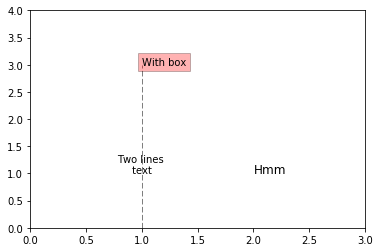

In [14]:
plt.plot([1 , 1], [0, 3], color='k', linewidth=0.5 , linestyle='--')
plt.text(2, 1, 'Hmm', fontsize=12)
plt.text(1, 1, 'Two lines \n text ', horizontalalignment='center')
plt.text(1, 3, 'With box', bbox=dict(facecolor='r', alpha=0.3))
plt.axis([0, 3, 0, 4])
plt.show()

## 多图：plt.figure()

多图可以让你运行一段代码，输出多个图片。原理是 plt.figure() 命令提供了新建画布的功能。

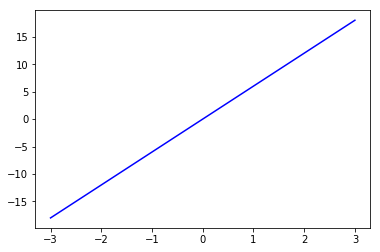

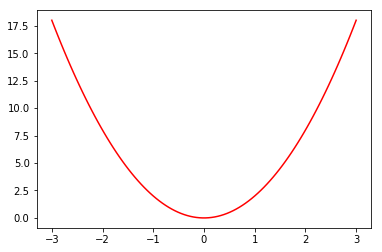

In [15]:
plt.figure(1) # 第一个图
plt.plot(x, y1, 'b-')
plt.figure(2) # 第二个图
plt.plot(x, y2, 'r-')

plt.show()

## 子图：plt.subplots

如果你需要对图片进行复杂的坐标轴刻度调整、添加标签与标题等等工作，可以使用 plt.subplots 命令。

**注意：这样需要将许多 plt 开头的命令转移到 axarr[N] 中去，比如 plt.plot 要换成 axarr[N].plot；有的形式还会变化，比如 plt.title 变成了 axarr[N].set_title.**

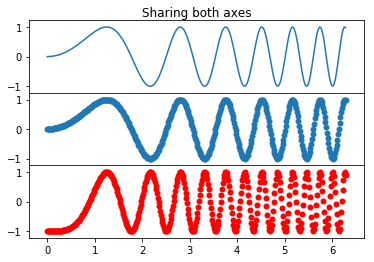

In [16]:
# 该例子改编自：http://matplotlib.org/examples/pylab_examples/subplots_demo.html
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
plt.close('all')

# axarr 是一个序列，存储了三个绘图句柄。
# 你也可以使用 f, (ax1, ax2, ax3) = plt.subplots(3)

f, axarr = plt.subplots(3, sharex=True, sharey=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing both axes')  # 类似的命令还有 set_xlabel 等等
axarr[1].scatter(x, y)
axarr[2].scatter(x, 2 * y ** 2 - 1, color='r')
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.show()

subplots 命令有许多可能用到的参数：

| 参数 | 含义 | 可选值 |
| --- | --- | --- |
| nrows | 子图的总行数 | 数字。默认值1 |
| ncols | 子图的总列数 | 数字。默认值1 |
| sharex | 共用 X 轴 | True/'all'：共用 X 轴，并在末行子图中显示刻度。 |
|  |  | False/'none'：不共用 X 轴。 |
|  |  | 'row'/'col'：按行/列共用 X 轴。 |
| sharey | 共用 Y 轴 | 类似 sharex |
| subplot_kw | 传给 add_subplot() 函数的参数 | 字典。常用的可能是 dict(projection='polar') |

有时候我们只是单纯地想添加图片，不想理会几行几列的排版问题。这时候可以使用 fig.add_subplot 命令。这个命令不在此介绍，请参考官方的文档。

最后，给出一个极坐标的例子：

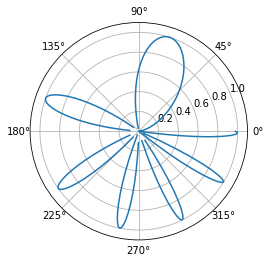

In [17]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))  # 或者 dict(polar=True)
ax.plot(x, y)

plt.show()

## 保存图片：fig.savefig

保存图片一般使用 fig.savefig 命令。比如下例会在你的D盘根目录下保存一个 pdf 图片文件。这样的结果是矢量的。如果你想保存为位图，可以使用 png/jpg 格式，并且可以用 dpi=[Value] 参数指定其图片质量。完整的调用参数是这样的：

    savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

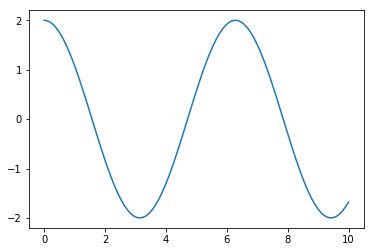

In [18]:
x = np.linspace (0, 10, 100)
y = 2* np.cos (x)

# plt.subplots 命令是一个便于管理返回值的命令
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

filename = r'd:\test.pdf'  # 这一步常常配合 os.getcwd() 来获取工作目录，再保存图片
fig.savefig(filename, transparent='True', format='pdf')

# 常见的问题

绝大部分的解决方案来自 Stack OverFLow 讨论。

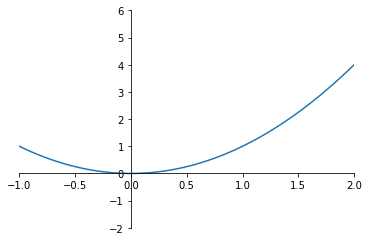

In [19]:
# 如何去掉右侧和上侧的框线？怎样把原始坐标轴画出来？
plt.close('all')
fig, ax = plt.subplots()
x = np.linspace(-1, 3, 100)
y = x**2
ax.plot(x, y)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.axis([-1, 2, -2, 6])
plt.show()

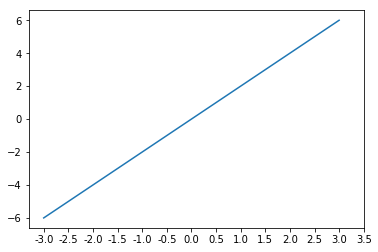

In [20]:
# 如何更改坐标轴小数点位数
import matplotlib.ticker as ticker

x = np.linspace(-3, 3, 100)
y = 2*x
fig, ax = plt.subplots()
ax.plot(x, y)
ax.xaxis.set_ticks(np.arange(-3, 4, 0.5))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.show()

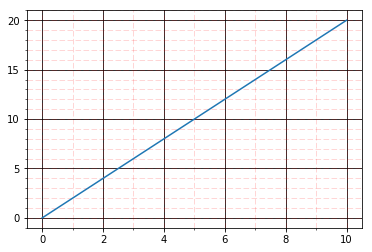

In [21]:
# 怎样设置主网格线和副网格线？以及两个轴向的网格线？
from matplotlib . ticker import MultipleLocator , FormatStrFormatter
x = np. linspace (0, 10, 100)
y = 2*x
plt.close('all')

fig, ax = plt.subplots()
ax.plot(x, y)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.grid(which='major', linestyle='-', color='k')
ax.grid(which='minor', linestyle='--', color='r', alpha=0.2)

plt.show()